Data source: https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease
age		-	age

bp		-	blood pressure

sg		-	specific gravity

al		-   	albumin

su		-	sugar

rbc		-	red blood cells

pc		-	pus cell

pcc		-	pus cell clumps

ba		-	bacteria

bgr		-	blood glucose random

bu		-	blood urea

sc		-	serum creatinine

sod		-	sodium

pot		-	potassium

hemo		-	hemoglobin

pcv		-	packed cell volume

wc		-	white blood cell count

rc		-	red blood cell count

htn		-	hypertension

dm		-	diabetes mellitus

cad		-	coronary artery disease

appet		-	appetite

pe		-	pedal edema

ane		-	anemia

class		-	class

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
kd_df = pd.read_csv('kidney_disease.csv', index_col=0)
kd_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [43]:
kd_df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [44]:
kd_df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [45]:
for col in kd_df.select_dtypes(include=np.object).columns:
    print(col, kd_df[col].unique())

rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
pcv ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
wc ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '

/tmp/ipykernel_202/3317808333.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for col in kd_df.select_dtypes(include=np.object).columns:


In [46]:
import re


def get_numbers(x):
    try:
        return re.match(r'(\d|\.)+', x).group(0)
    except:
        return np.NAN


def clear_categorical(x):
    try:
        return re.findall(r'((\\t)*(\w+))', x)[0][-1]
    except:
        return np.NAN


kd_df['pcv'] = pd.to_numeric(kd_df['pcv'].apply(get_numbers))
kd_df['wc'] = pd.to_numeric(kd_df['wc'].apply(get_numbers))
kd_df['rc'] = pd.to_numeric(kd_df['rc'].apply(get_numbers))

kd_df['dm'] = kd_df['dm'].apply(clear_categorical)
kd_df['cad'] = kd_df['cad'].apply(clear_categorical)
kd_df['classification'] = kd_df['classification'].replace('ckd\t', 'ckd')

for col in kd_df.select_dtypes(include=np.object).columns:
    print(col, kd_df[col].unique())

rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
htn ['yes' 'no' nan]
dm ['yes' 'no' nan]
cad ['no' 'yes' nan]
appet ['good' 'poor' nan]
pe ['no' 'yes' nan]
ane ['no' 'yes' nan]
classification ['ckd' 'notckd']


/tmp/ipykernel_202/1983046765.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for col in kd_df.select_dtypes(include=np.object).columns:


In [47]:
numeric = kd_df.select_dtypes(include=np.number)
numeric.isna().sum()

age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      72
wc      108
rc      131
dtype: int64

In [48]:
categorical = kd_df.select_dtypes(include=np.object)
categorical.isna().sum()

/tmp/ipykernel_202/2262629563.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = kd_df.select_dtypes(include=np.object)


rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [49]:
len(kd_df)

400

In [50]:
kd_df_nan_cols = kd_df.copy()
for col in kd_df_nan_cols.columns:
    count_nan = kd_df_nan_cols[col].isna().sum()
    if count_nan != 0:
        nan_col = col+'_isnan'
        kd_df_nan_cols[nan_col] = 0
        kd_df_nan_cols.loc[kd_df_nan_cols[col].isna(), nan_col] = 1
        if col in numeric.columns:
            kd_df_nan_cols[col].fillna(kd_df_nan_cols[col].mean(), inplace=True)
        if col in categorical.columns:
            kd_df_nan_cols[col].fillna(kd_df_nan_cols.loc[~kd_df_nan_cols.rbc.isna()][col].mode()[0], inplace=True)
kd_df_nan_cols.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo_isnan,pcv_isnan,wc_isnan,rc_isnan,htn_isnan,dm_isnan,cad_isnan,appet_isnan,pe_isnan,ane_isnan
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,0,0,0,0,0,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,0,0,0,1,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,0,0,0,1,0,0,0,0,0,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,0,0,0,0,0,0,0,0,0,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,0,0,0,0,0,0,0,0,0,0


In [51]:
kd_df_nan_cols.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
age_isnan         0
bp_isnan          0
sg_isnan          0
al_isnan          0
su_isnan          0
rbc_isnan         0
pc_isnan          0
pcc_isnan         0
ba_isnan          0
bgr_isnan         0
bu_isnan          0
sc_isnan          0
sod_isnan         0
pot_isnan         0
hemo_isnan        0
pcv_isnan         0
wc_isnan          0
rc_isnan          0
htn_isnan         0
dm_isnan          0
cad_isnan         0
appet_isnan       0
pe_isnan          0
ane_isnan         0
dtype: int64

In [52]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
for col in kd_df_nan_cols.select_dtypes(include=np.object).drop('classification', axis=1):
    col_encoded = pd.DataFrame(encoder.fit_transform(kd_df_nan_cols[col].to_frame()), index=kd_df_nan_cols.index)
    kd_df_nan_cols[col] = col_encoded
target_encoded = pd.DataFrame(encoder.fit_transform(kd_df_nan_cols['classification'].to_frame()), index=kd_df_nan_cols.index)
kd_df_nan_cols['classification_encoded'] = target_encoded
kd_df_nan_cols

/tmp/ipykernel_202/390576470.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for col in kd_df_nan_cols.select_dtypes(include=np.object).drop('classification', axis=1):


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv_isnan,wc_isnan,rc_isnan,htn_isnan,dm_isnan,cad_isnan,appet_isnan,pe_isnan,ane_isnan,classification_encoded
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.000000,...,0,0,0,0,0,0,0,0,0,0.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,148.036517,...,0,0,1,0,0,0,0,0,0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.000000,...,0,0,1,0,0,0,0,0,0,0.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,...,0,0,0,0,0,0,0,0,0,0.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.000000,...,0,0,0,0,0,0,0,0,0,1.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.000000,...,0,0,0,0,0,0,0,0,0,1.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.000000,...,0,0,0,0,0,0,0,0,0,1.0


<Axes: >

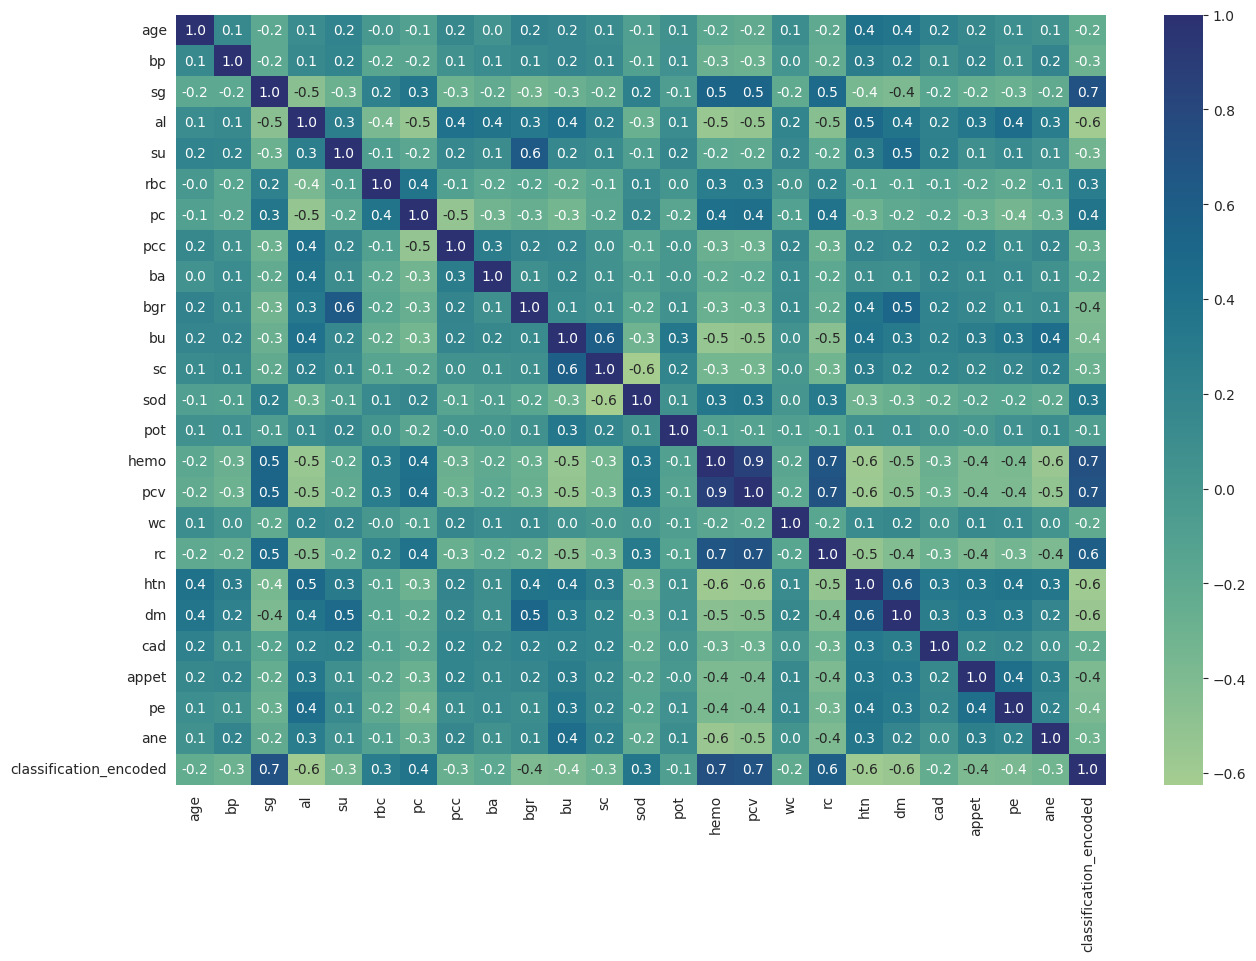

In [64]:
heatmap_cols = [col for col in kd_df_nan_cols.select_dtypes(include=np.number).columns if 'isnan' not in col]
plt.figure(figsize=(15, 10))
sns.heatmap(data=kd_df_nan_cols[heatmap_cols].corr(), annot=True, fmt='.1f', cmap='crest')

### Hemo and Pcv have a strong correlation, so we will drop one of them

In [67]:
from sklearn.model_selection import train_test_split

X = kd_df_nan_cols.drop(['classification_encoded', 'classification', 'hemo', 'hemo_isnan'], axis=1)
y = kd_df_nan_cols['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', penalty='l1')
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

<Axes: >

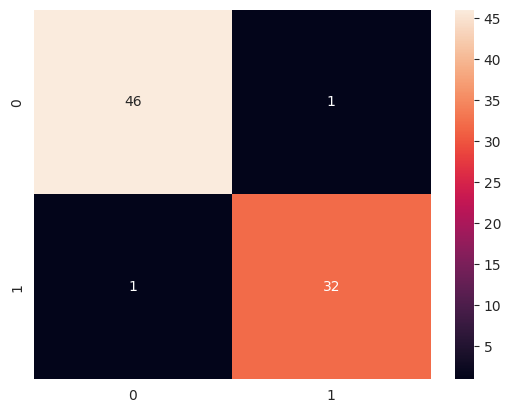

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
pred = model.predict(X_test)

sns.heatmap(data=confusion_matrix(y_test, pred), annot=True)

In [85]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ckd       0.98      0.98      0.98        47
      notckd       0.97      0.97      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

